# Logistic Regression


Let's try to solve a real (yet easy) problem using sklearn. Let's load the iris flower datasets.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X = data.data
y = data.target

Let's examine the data

In [3]:
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

We can also plot them according to the first two dimensions!

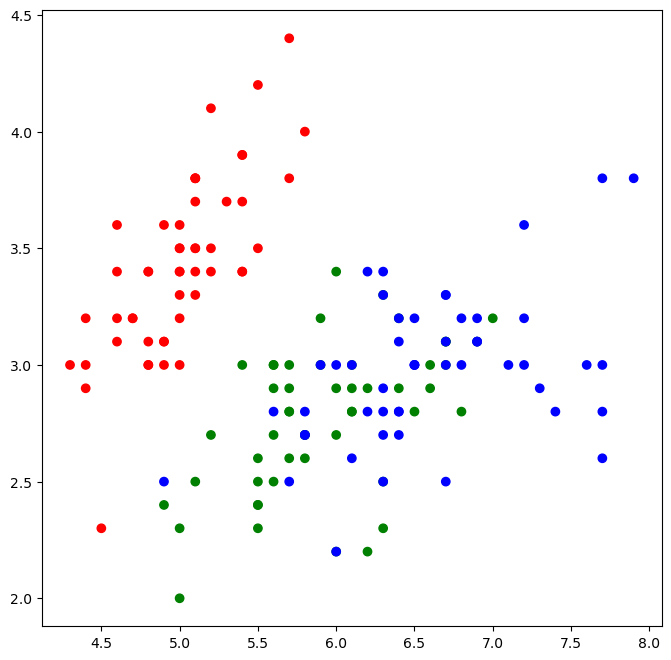

In [4]:
colors = ['red','green','blue']

fig = plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))

Before training any algorithm we should first split the data into train/test.

In [5]:
idx = np.random.permutation(len(y))
x_train, y_train = X[idx[:100]], y[idx[:100]]
x_test, y_test = X[idx[100:]], y[idx[100:]]

Check the split!

In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


## Training a classifier

We are now ready to train our logistic regression model!

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

We should first preprocess our data!

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Let's examine the behavior of the model:

In [12]:
print("Train accuracy = ", model.score(x_train, y_train)*100)
print("Test accuracy = ", model.score(x_test, y_test)*100)

Train accuracy =  92.0
Test accuracy =  90.0


We can also measure the accuracy by hand:

In [13]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [14]:
print("Train accuracy = ", 100*np.sum(y_train_pred == y_train)/len(y_train))
print("Test accuracy = ", 100*np.sum(y_test_pred == y_test)/len(y_test))

Train accuracy =  92.0
Test accuracy =  90.0


We can also experiment with regularization (C values are inverse of lambdas, default is 1)

In [15]:
model = LogisticRegression(C=200)
model.fit(x_train, y_train)
print("Train accuracy = ", model.score(x_train, y_train)*100)
print("Test accuracy = ", model.score(x_test, y_test)*100)

Train accuracy =  98.0
Test accuracy =  96.0


In [16]:
model = LogisticRegression(C=0.1)
model.fit(x_train, y_train)
print("Train accuracy = ", model.score(x_train, y_train)*100)
print("Test accuracy = ", model.score(x_test, y_test)*100)

Train accuracy =  84.0
Test accuracy =  76.0


We can also try a different way of normalization the data!

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
model = LogisticRegression(C=0.1)
model.fit(x_train, y_train)
print("Train accuracy = ", model.score(x_train, y_train)*100)
print("Test accuracy = ", model.score(x_test, y_test)*100)

Train accuracy =  89.0
Test accuracy =  88.0


In [19]:
model = LogisticRegression(C=1)
model.fit(x_train, y_train)
print("Train accuracy = ", model.score(x_train, y_train)*100)
print("Test accuracy = ", model.score(x_test, y_test)*100)

Train accuracy =  99.0
Test accuracy =  92.0


In [20]:
model = LogisticRegression(C=200)
model.fit(x_train, y_train)
print("Train accuracy = ", model.score(x_train, y_train)*100)
print("Test accuracy = ", model.score(x_test, y_test)*100)

Train accuracy =  98.0
Test accuracy =  94.0
